<a href="https://colab.research.google.com/github/Ihsan1-hue/IhsanHKurniawan-2206130/blob/main/enchatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload gambar yang akan diproses:


Saving Screenshot 2024-10-17 152644.png to Screenshot 2024-10-17 152644.png
Saving Screenshot 2024-10-17 152803.png to Screenshot 2024-10-17 152803.png

=== OPERASI LOGIKA ===


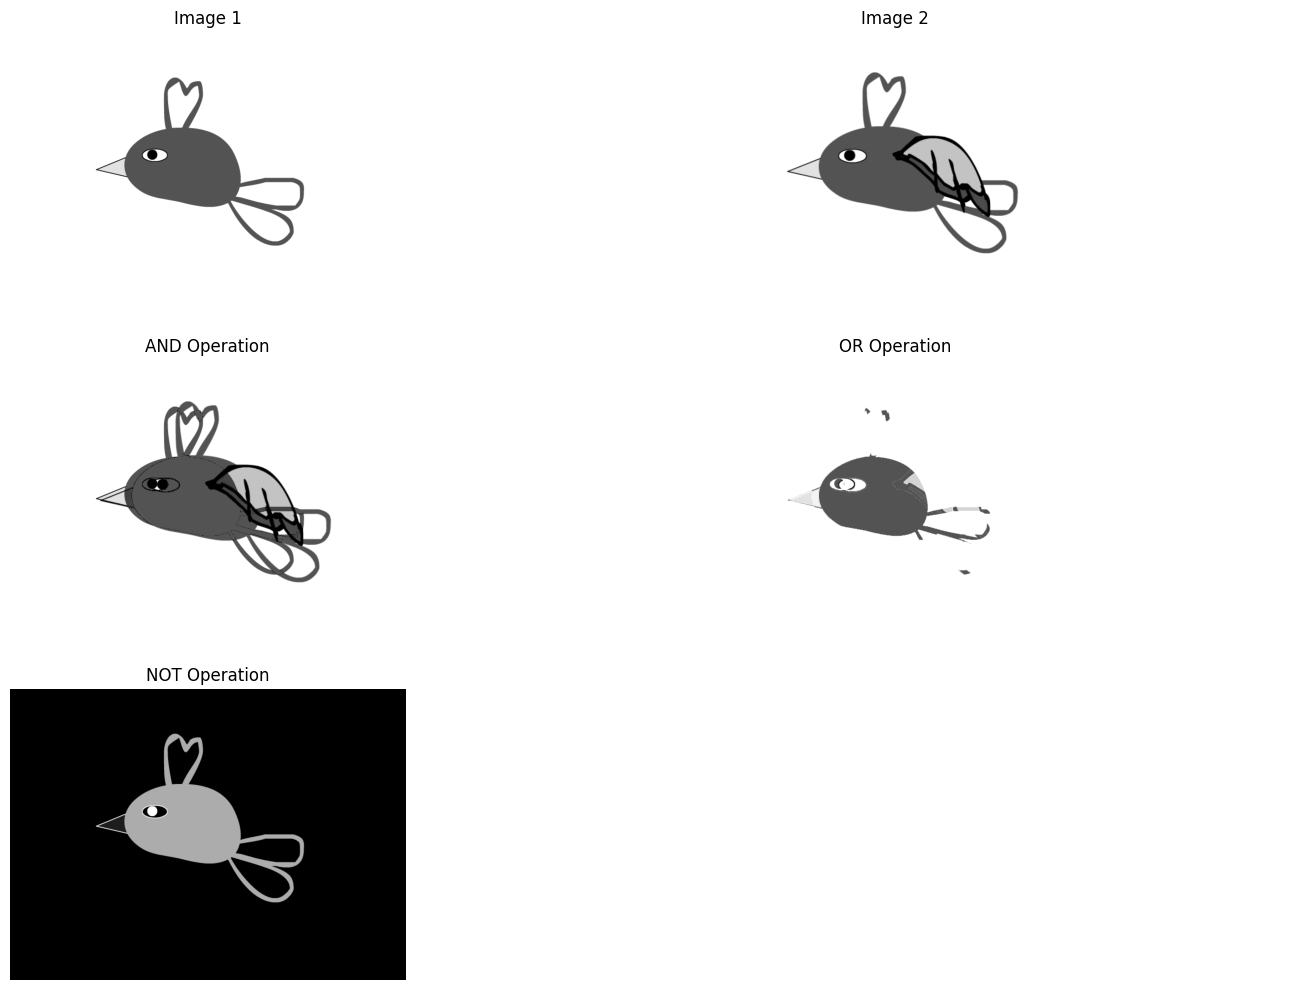


=== OPERASI ARITMETIKA ===


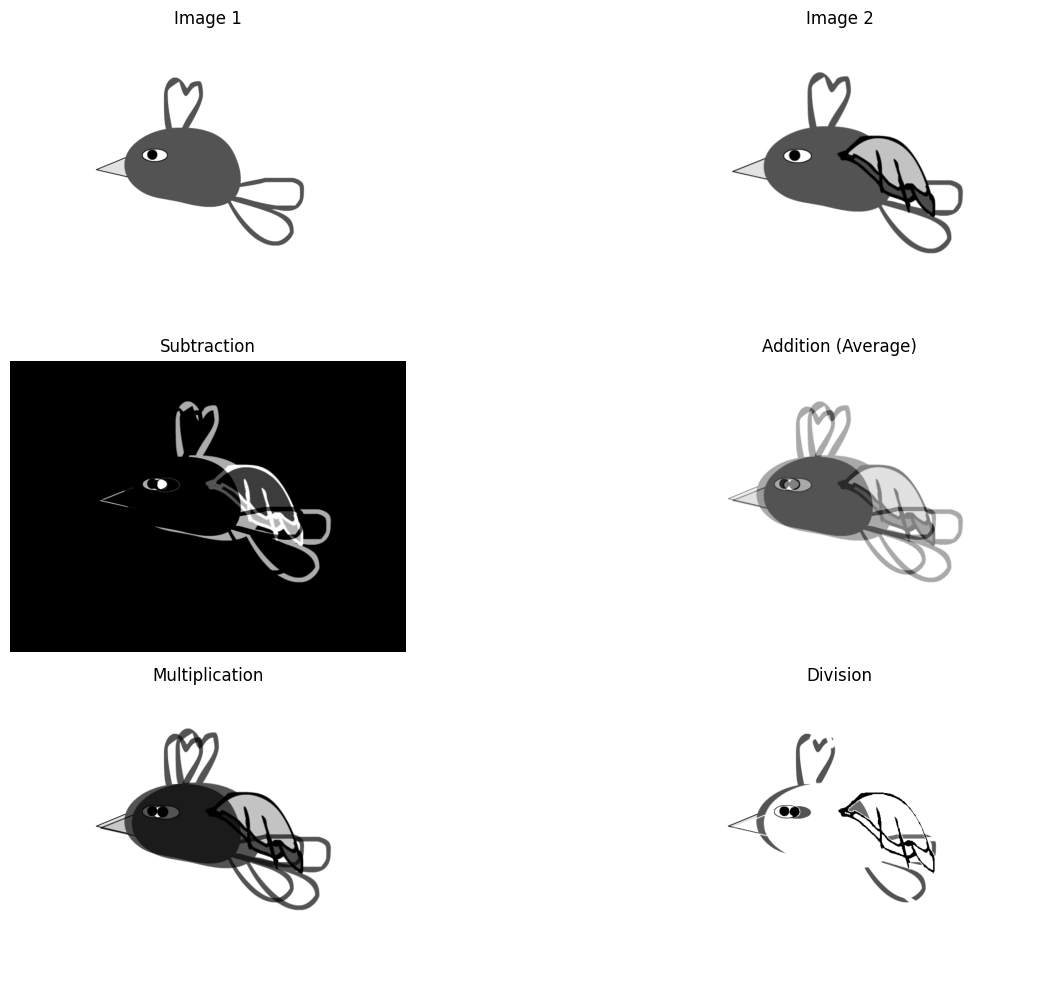


=== BACKGROUND REMOVAL ===


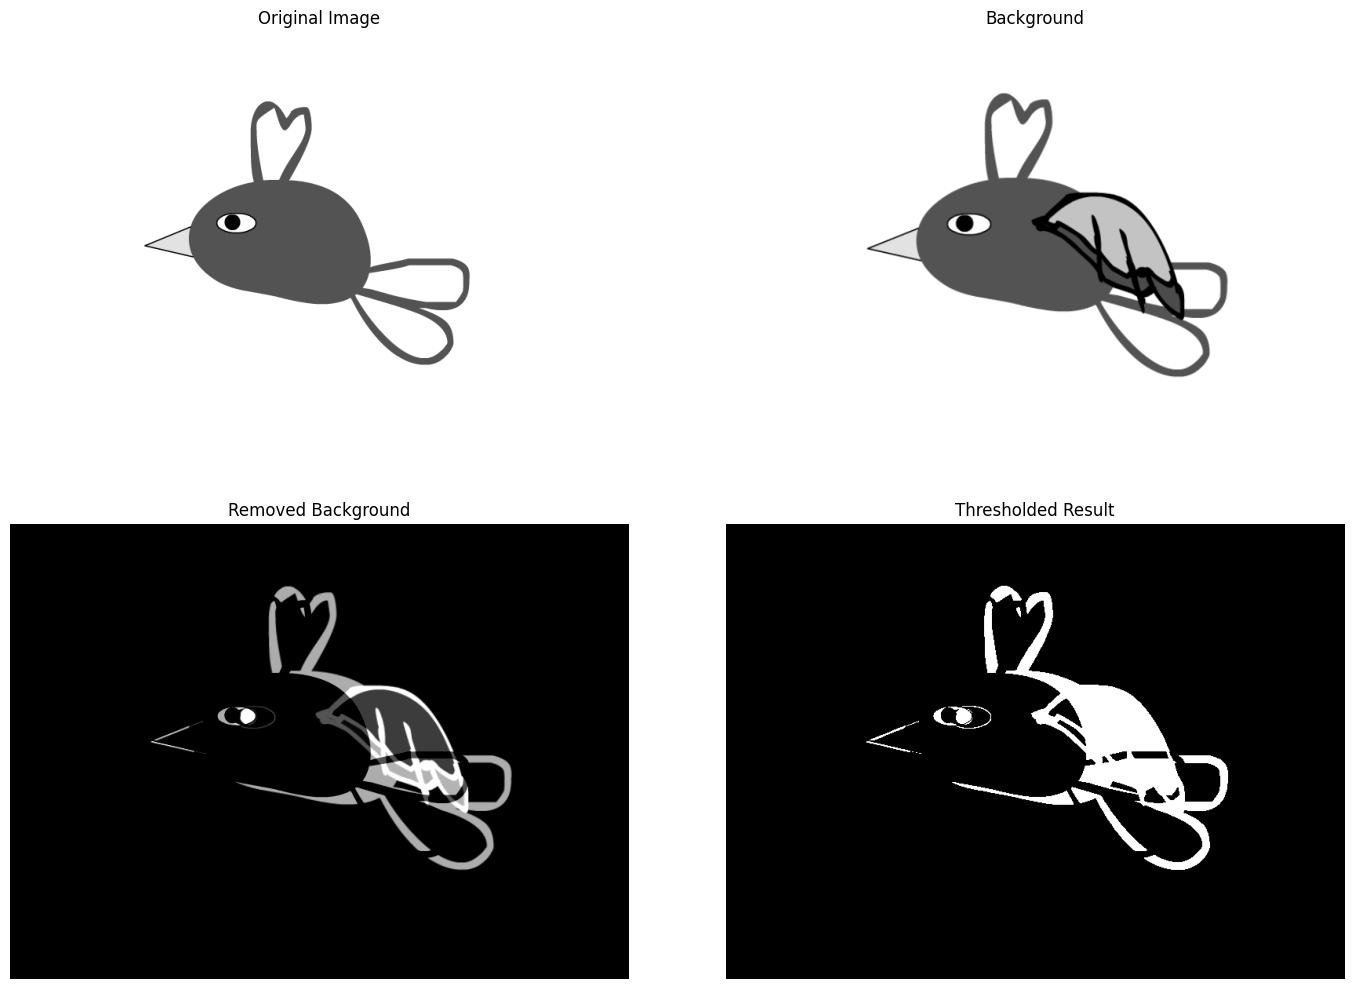


=== NOISE REDUCTION DENGAN IMAGE AVERAGING ===


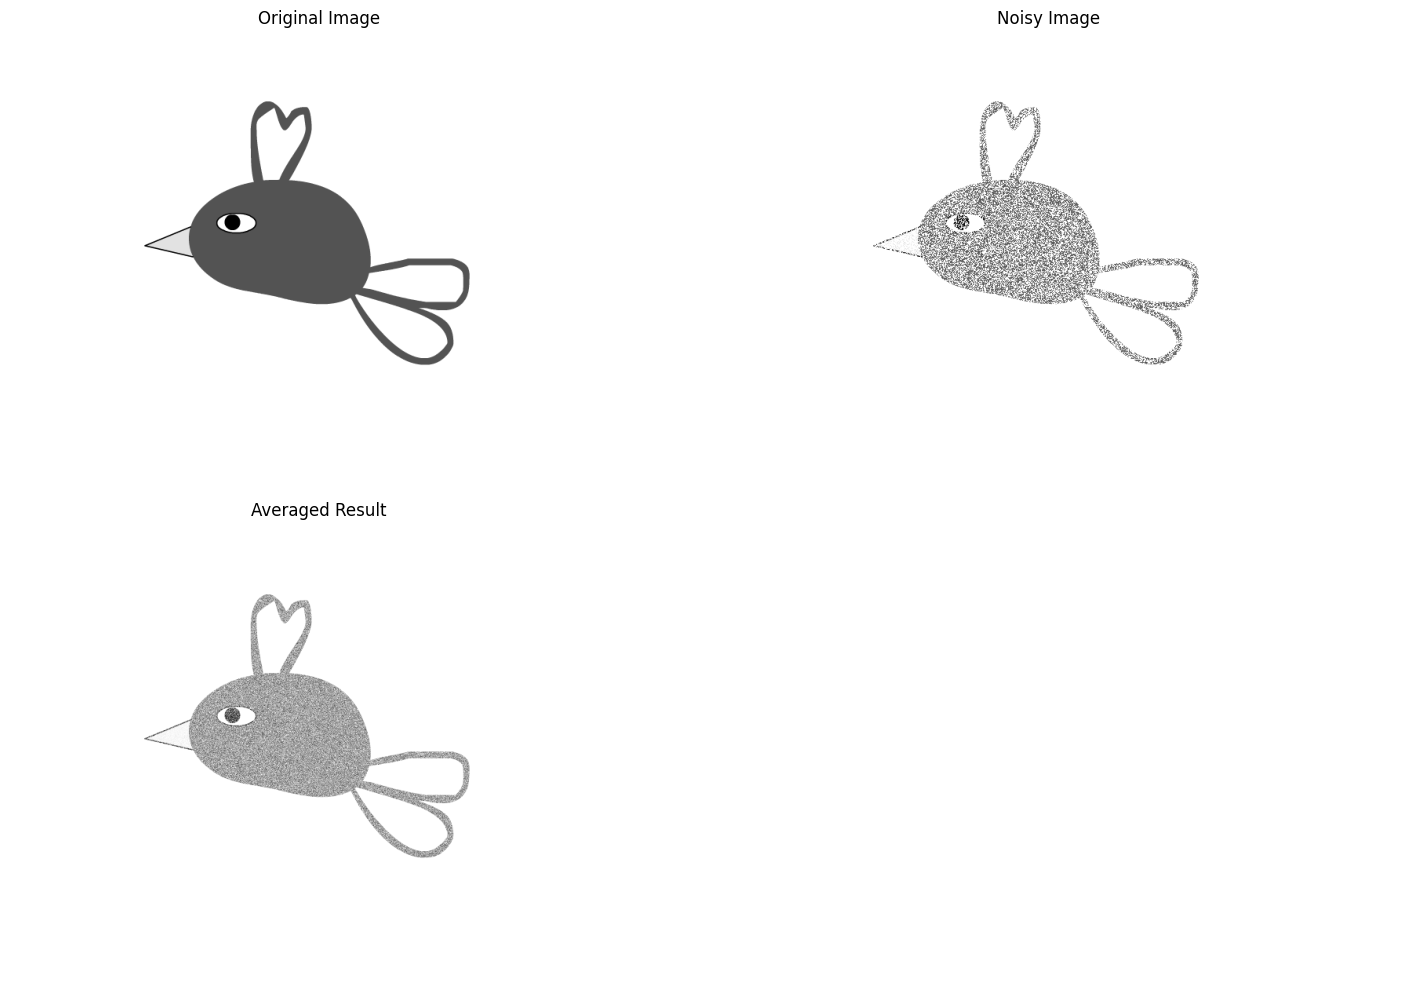


=== HISTOGRAM EQUALIZATION ===


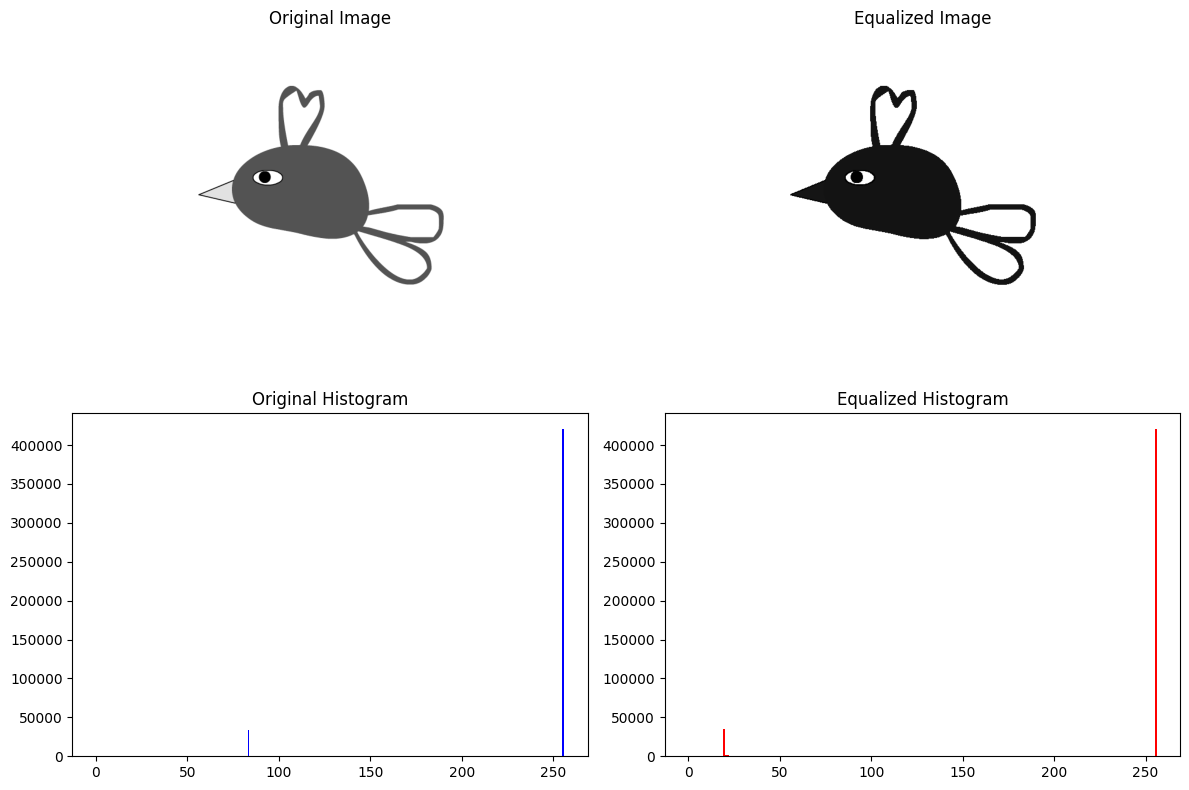

In [4]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')

# 1. FUNGSI UTILITAS UNTUK MENAMPILKAN GAMBAR
def show_images(images, titles=None, cols=2, figsize=(15,10)):
    rows = len(images) // cols + (1 if len(images) % cols != 0 else 0)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for idx, (img, ax) in enumerate(zip(images, axes)):
        if len(img.shape) == 2:
            ax.imshow(img, cmap='gray')
        else:
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        if titles:
            ax.set_title(titles[idx])
        ax.axis('off')

    # Sembunyikan subplot yang kosong
    for idx in range(len(images), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# 2. UPLOAD GAMBAR
print("Upload gambar yang akan diproses:")
uploaded = files.upload()

# Baca gambar yang diupload
image_names = list(uploaded.keys())
img1 = cv2.imread(image_names[0])
if len(image_names) > 1:
    img2 = cv2.imread(image_names[1])
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# 3. OPERASI LOGIKA
def logical_operations(img1, img2):
    # Konversi ke grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Operasi AND
    img_and = cv2.bitwise_and(gray1, gray2)

    # Operasi OR
    img_or = cv2.bitwise_or(gray1, gray2)

    # Operasi NOT
    img_not1 = cv2.bitwise_not(gray1)

    show_images([gray1, gray2, img_and, img_or, img_not1],
                ['Image 1', 'Image 2', 'AND Operation', 'OR Operation', 'NOT Operation'])

# 4. OPERASI ARITMETIKA
def arithmetic_operations(img1, img2):
    # Konversi ke grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Pengurangan
    subtraction = cv2.subtract(gray1, gray2)

    # Penjumlahan (rata-rata)
    addition = cv2.addWeighted(gray1, 0.5, gray2, 0.5, 0)

    # Perkalian
    multiplication = cv2.multiply(gray1, gray2, scale=1/255)

    # Pembagian
    # Menghindari pembagian dengan nol
    division = np.zeros_like(gray1, dtype=np.float32)
    mask = gray2 != 0
    division[mask] = gray1[mask] / gray2[mask]
    division = np.uint8(np.clip(division * 255, 0, 255))

    show_images([gray1, gray2, subtraction, addition, multiplication, division],
                ['Image 1', 'Image 2', 'Subtraction', 'Addition (Average)',
                 'Multiplication', 'Division'])

# 5. BACKGROUND REMOVAL
def background_removal(img1, img2):
    # Konversi ke grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Background removal menggunakan pengurangan
    removed_bg = cv2.subtract(gray1, gray2)

    # Thresholding untuk memperjelas hasil
    _, thresh = cv2.threshold(removed_bg, 30, 255, cv2.THRESH_BINARY)

    show_images([gray1, gray2, removed_bg, thresh],
                ['Original Image', 'Background', 'Removed Background', 'Thresholded Result'])

# 6. NOISE REDUCTION DENGAN IMAGE AVERAGING
def noise_reduction_averaging():
    # Membuat gambar dengan noise
    base_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    noisy_images = []

    # Membuat 10 gambar dengan noise
    for i in range(10):
        noise = np.random.normal(0, 25, base_img.shape).astype(np.uint8)
        noisy_img = cv2.add(base_img, noise)
        noisy_images.append(noisy_img)

    # Averaging
    averaged_img = np.mean(noisy_images, axis=0).astype(np.uint8)

    show_images([base_img, noisy_images[0], averaged_img],
                ['Original Image', 'Noisy Image', 'Averaged Result'])

# MENJALANKAN SEMUA OPERASI
print("\n=== OPERASI LOGIKA ===")
logical_operations(img1, img2)

print("\n=== OPERASI ARITMETIKA ===")
arithmetic_operations(img1, img2)

print("\n=== BACKGROUND REMOVAL ===")
background_removal(img1, img2)

print("\n=== NOISE REDUCTION DENGAN IMAGE AVERAGING ===")
noise_reduction_averaging()

# 7. BONUS: HISTOGRAM EQUALIZATION
def histogram_equalization(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    equ = cv2.equalizeHist(gray)

    # Plot histogram
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

    ax1.imshow(gray, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(equ, cmap='gray')
    ax2.set_title('Equalized Image')
    ax2.axis('off')

    ax3.hist(gray.flatten(), 256, [0, 256], color='b')
    ax3.set_title('Original Histogram')

    ax4.hist(equ.flatten(), 256, [0, 256], color='r')
    ax4.set_title('Equalized Histogram')

    plt.tight_layout()
    plt.show()

print("\n=== HISTOGRAM EQUALIZATION ===")
histogram_equalization(img1)